<a href="https://colab.research.google.com/github/FelipeFerAl/TAM-2025-2/blob/main/ClassExercises/DeepLearningIntroduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output
from IPython.display import display
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import time

In [2]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

batch_sizes = [32, 64, 128, 256, 512]
results = []
histories = {}

In [3]:
fashion_mnist = keras.datasets.fashion_mnist #cargar fashion mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [5]:
for batch in batch_sizes:
  # Crear un nuevo modelo (para que no herede pesos previos)
  model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.Dense(300, activation="relu"),
      keras.layers.Dense(100, activation="relu"),
      keras.layers.Dense(10, activation="softmax")
  ])

  model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

  # Medir tiempo
  start_time = time.time()
  history = model.fit(X_train, y_train, epochs=10, batch_size=batch,
                      validation_data=(X_valid, y_valid), verbose=0)
  end_time = time.time()

  # Evaluar en test set
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

  # Calcular tiempo promedio por epoch
  avg_time_per_epoch = (end_time - start_time) / 10.0

  # Guardar resultados
  results.append({
    "Batch Size": batch,
    "Test Accuracy": test_acc,
    "Test Loss": test_loss,
    "Avg Time per Epoch (s)": avg_time_per_epoch
  })
  histories[batch] = history.history
  clear_output(wait=True)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Crear tabla de resultados
results_df = pd.DataFrame(results)
display(results_df)

,Batch Size,Test Accuracy,Test Loss,Avg Time per Epoch (s)
0,32,0.8694,0.371484,4.526645
1,64,0.8528,0.416703,2.237931
2,128,0.8402,0.453751,1.353611
3,256,0.8277,0.500352,0.893431
4,512,0.8030,0.581971,0.649997


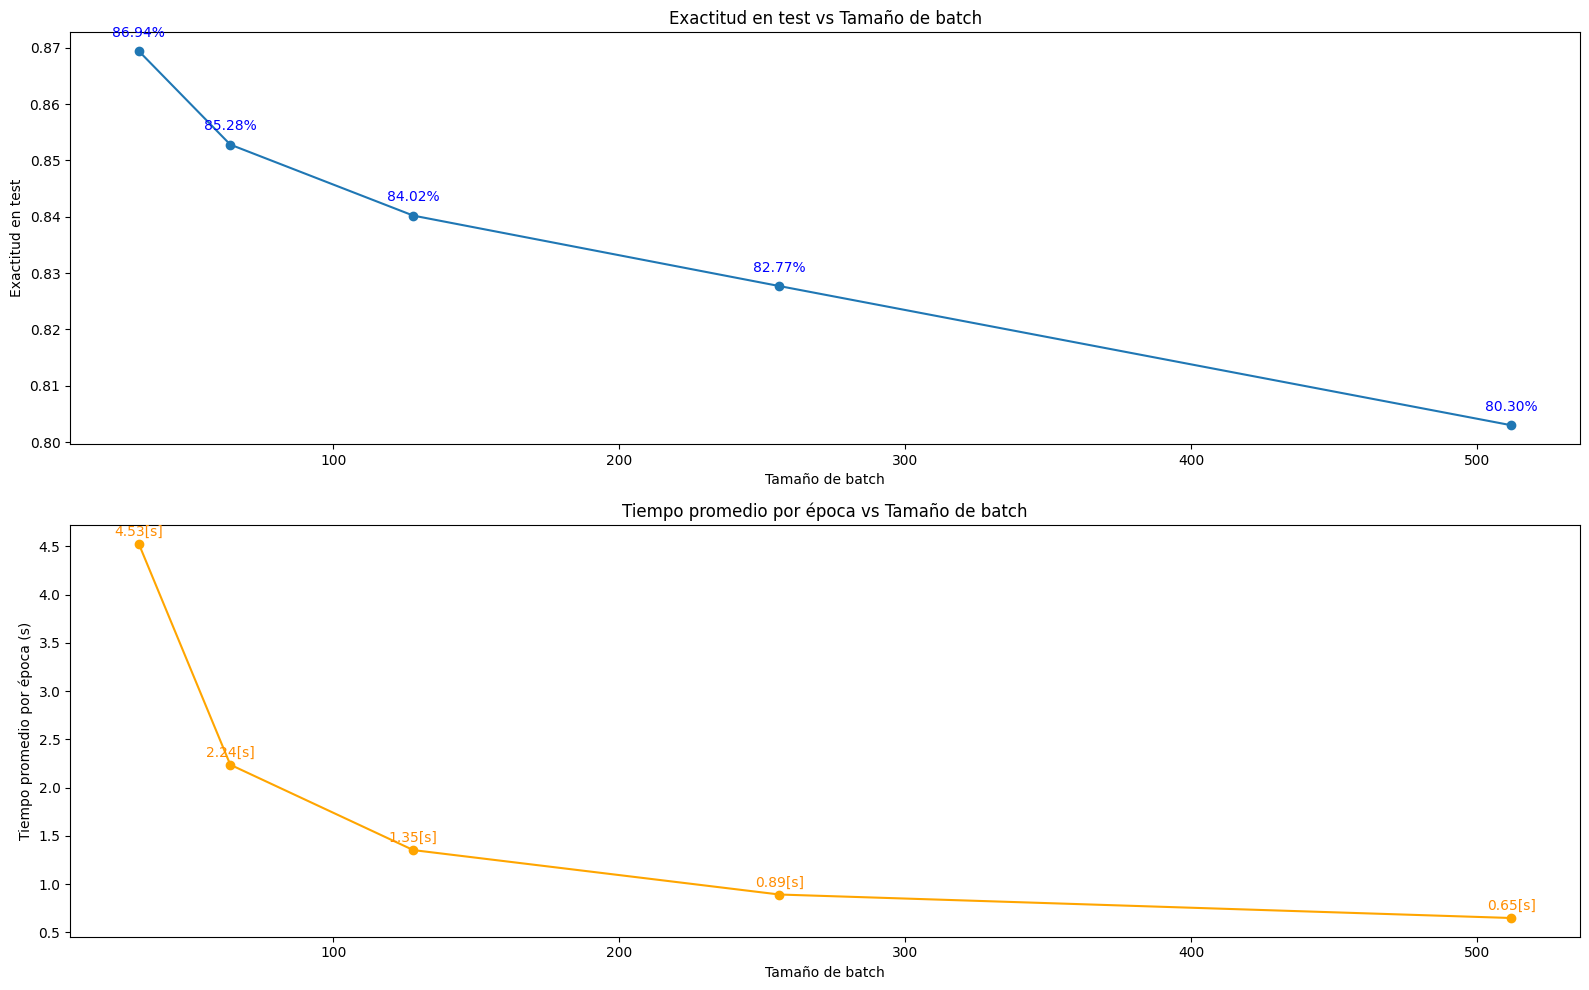

In [18]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.plot(results_df["Batch Size"], results_df["Test Accuracy"], marker='o')
plt.title("Exactitud en test vs Tamaño de batch")
plt.xlabel("Tamaño de batch")
plt.ylabel("Exactitud en test")
for x, y in zip(results_df["Batch Size"], results_df["Test Accuracy"]):
  plt.text(x, y + 0.002, f"{y*100:.2f}%", ha='center', va='bottom', fontsize=10, color='blue')
plt.subplot(2,1,2)
plt.plot(results_df["Batch Size"], results_df["Avg Time per Epoch (s)"], marker='o', color='orange')
plt.title("Tiempo promedio por época vs Tamaño de batch")
plt.xlabel("Tamaño de batch")
plt.ylabel("Tiempo promedio por época (s)")
for x, y in zip(results_df["Batch Size"], results_df["Avg Time per Epoch (s)"]):
  plt.text(x, y + 0.05, f"{y:.2f}[s]", ha='center', va='bottom', fontsize=10, color='darkorange')
plt.tight_layout()
plt.show()

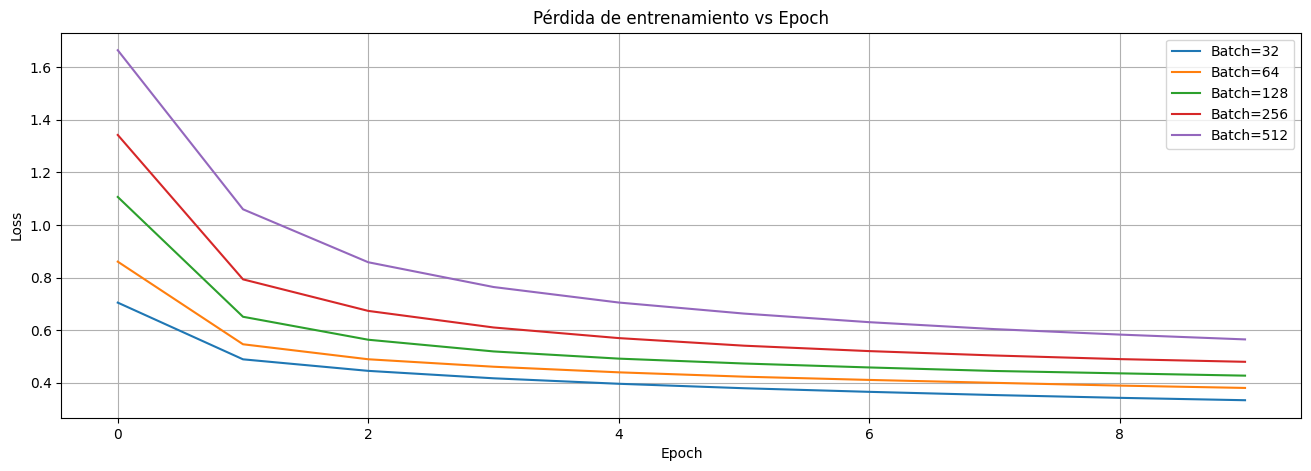

In [8]:
# --- Graficar evolución de la pérdida durante entrenamiento ---
plt.figure(figsize=(16,5))
for batch, hist in histories.items():
  plt.plot(hist["loss"], label=f"Batch={batch}")
plt.title("Pérdida de entrenamiento vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

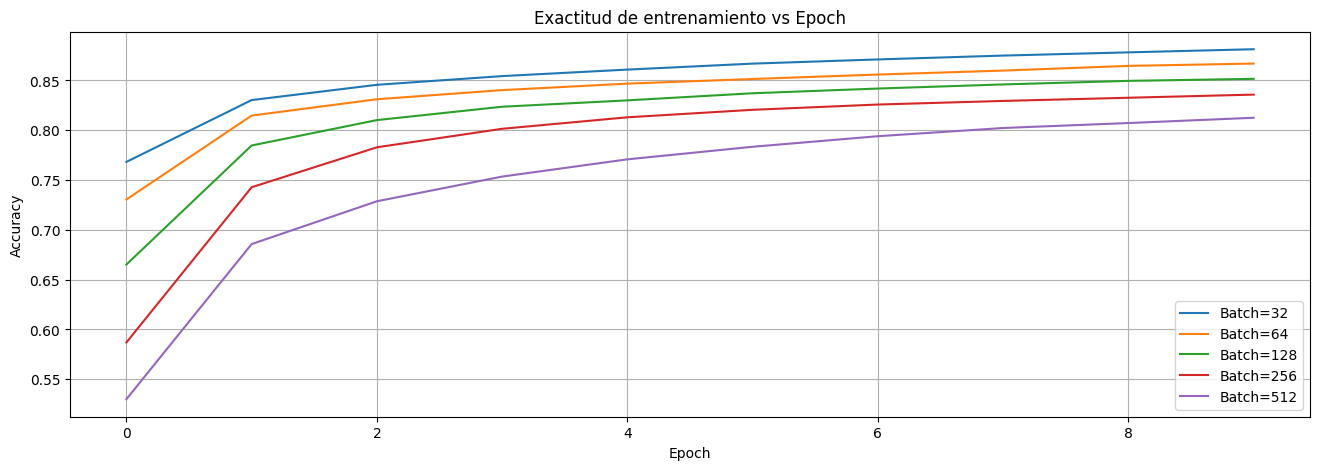

In [9]:
# --- Graficar evolución de la exactitud durante entrenamiento ---
plt.figure(figsize=(16,5))
for batch, hist in histories.items():
  plt.plot(hist["accuracy"], label=f"Batch={batch}")
plt.title("Exactitud de entrenamiento vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()